# Multinomial Naive Bayes Classifier for SMS Spam Collection Data Set


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [2]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# loading dataset
spam_collection = pd.read_csv("sample-data/SMSSpamCollection", sep="\t", names=["label","text"])
spam_collection.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
spam_collection.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
spam_collection['length_of_msg'] = spam_collection['text'].str.len()
spam_collection['labeled'] = spam_collection['label'].map({"ham":0, "spam":1})
spam_collection.head(10)

,label,text,length_of_msg,labeled
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,1
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WINNER!! As a valued network customer you have...,157,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1


array([[<AxesSubplot:title={'center':'length_of_msg'}>]], dtype=object)

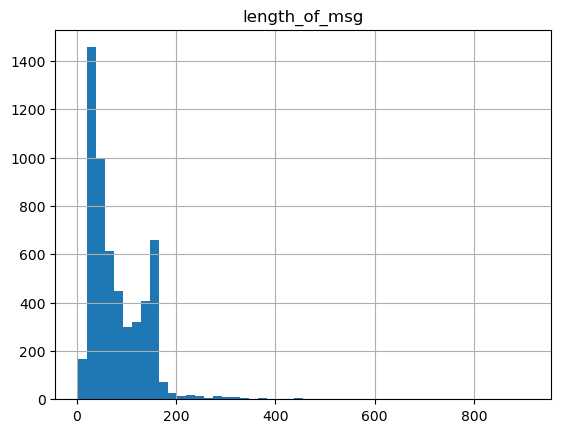

In [5]:
spam_collection.hist(column='length_of_msg', bins=50)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

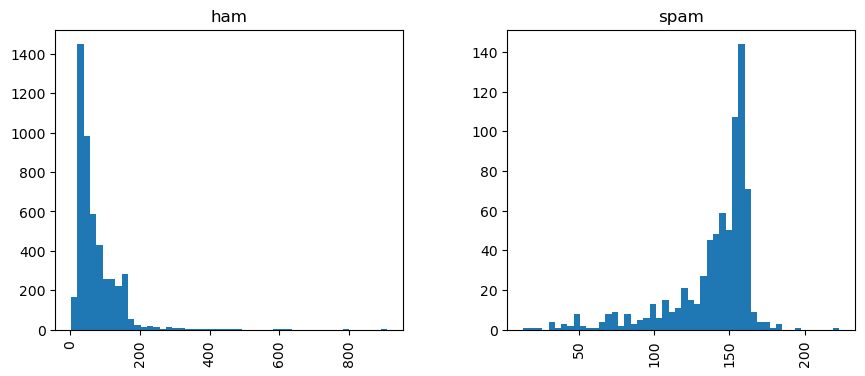

In [6]:
spam_collection.hist(column='length_of_msg', by='label', bins=50, figsize=(10,4))

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(spam_collection['text'], spam_collection['labeled'])

### The CountVectorizer generates a feature matrix that contains the frequency of each word in the text, which can be used as input to the Naive Bayes Classifier to train and classify new text data.

In [8]:
# bag of words: Convert a collection of text documents to a matrix of token counts.

bow = CountVectorizer()
bow.fit(xtrain)

CountVectorizer()

In [9]:
# freuence of words used
#bow.vocabulary_ printing 50 worlds and its count in train set
print([(k,v) for i, (k, v) in enumerate(bow.vocabulary_.items()) if i<50])

[('but', 1562), ('my', 4590), ('family', 2717), ('not', 4750), ('responding', 5614), ('for', 2885), ('anything', 992), ('now', 4763), ('am', 925), ('in', 3578), ('room', 5682), ('went', 7269), ('to', 6753), ('home', 3412), ('diwali', 2338), ('no', 4716), ('one', 4848), ('called', 1596), ('me', 4335), ('and', 952), ('why', 7310), ('coming', 1894), ('it', 3690), ('makes', 4256), ('feel', 2752), ('like', 4041), ('died', 2278), ('life', 4031), ('is', 3678), ('more', 4508), ('strict', 6348), ('than', 6623), ('teacher', 6559), ('bcoz', 1255), ('teaches', 6560), ('lesson', 4015), ('amp', 940), ('then', 6652), ('conducts', 1934), ('exam', 2648), ('first', 2820), ('lessons', 4016), ('happy', 3271), ('morning', 4511), ('dont', 2377), ('gimme', 3070), ('that', 6634), ('lip', 4068), ('caveboy', 1678), ('hello', 3334)]


In [10]:
# transforming train and test data sets into 
xtrain_transformed = bow.transform(xtrain)
xtest_transformed = bow.transform(xtest)

In [11]:
# training model
nb_clf = MultinomialNB()
nb_clf.fit(xtrain_transformed, ytrain)

MultinomialNB()

In [12]:
# predicting for test set 
y_h = nb_clf.predict(xtest_transformed)
y_h_proba = nb_clf.predict_proba(xtest_transformed)[:, 1] # probability of +ve (spam) class - will be required in ROC

In [13]:
accuracy_score(ytest, y_h)

0.9877961234745154

In [14]:
confusion_matrix(ytest, y_h)

array([[1207,    6],
       [  11,  169]], dtype=int64)

In [15]:
precision_score(ytest, y_h)

0.9657142857142857

In [16]:
recall_score(ytest, y_h)

0.9388888888888889

In [17]:
f1_score(ytest, y_h)

0.952112676056338

In [18]:
fpr, tpr, th = roc_curve(ytest, y_h_proba)
auc(fpr, tpr)

0.9841027754877714

In [19]:
roc_auc_score(ytest, y_h_proba)

0.9841027754877714

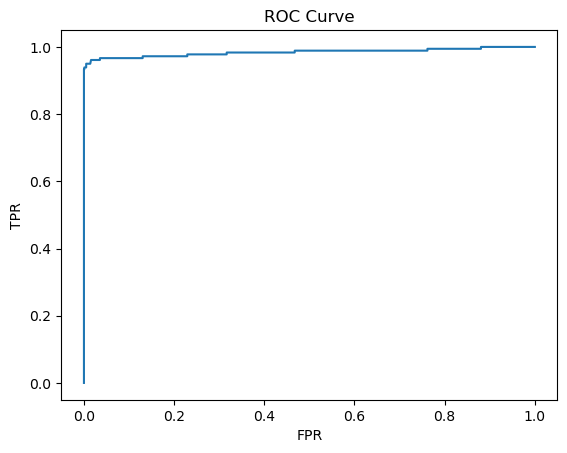

In [20]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

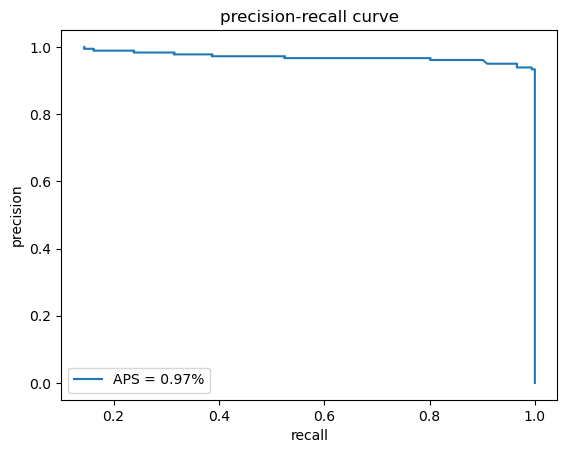

In [21]:
precision, recall, threshold = precision_recall_curve(ytest, y_h_proba)
avg_precision_score = average_precision_score(ytest, y_h_proba)

plt.plot(precision, recall, label='APS = {0:2.2f}%'.format(avg_precision_score))
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision-recall curve')
plt.legend()
plt.show()